In [118]:

import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import ydata_profiling as  ProfileReport
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,  classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tpot import TPOTRegressor

import warnings
warnings.filterwarnings('ignore')

In [119]:
# загрузил датасет
car_price = pd.read_csv('/Users/evgenijselisev/Desktop/car_price_prediction.csv')

# посмотрел данные
car_price.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [120]:
car_price.columns


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [121]:
print(list(car_price['Levy'].unique()))
# посмотрел значения во столбце Levy - сумма налогоболажения, есть значение "-", заменяю его на 0

['1399', '1018', '-', '862', '446', '891', '761', '751', '394', '1053', '1055', '1079', '810', '2386', '1850', '531', '586', '1249', '2455', '583', '1537', '1288', '915', '1750', '707', '1077', '1486', '1091', '650', '382', '1436', '1194', '503', '1017', '1104', '639', '629', '919', '781', '530', '640', '765', '777', '779', '934', '769', '645', '1185', '1324', '830', '1187', '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811', '988', '917', '1156', '687', '11714', '836', '1347', '2866', '1646', '259', '609', '697', '585', '475', '690', '308', '1823', '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872', '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333', '1325', '247', '879', '1342', '1327', '1598', '1514', '1058', '738', '1935', '481', '1522', '1282', '456', '880', '900', '798', '1277', '442', '1051', '790', '1292', '1047', '528', '1211', '1493', '1793', '574', '930', '1998', '271', '706', '1481', '1677', '1661', '1286', '1408', '1090', '595

In [122]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [123]:
for column in car_price.columns:
    nan_count = car_price[column].isnull().sum()
    total_count = len(car_price[column])
    percentage = nan_count/total_count*100
    print(f'Процент NaN значений в столбце {column} равен {percentage}%')
# вывод процента пропущеннных значений по столбцам  

Процент NaN значений в столбце ID равен 0.0%
Процент NaN значений в столбце Price равен 0.0%
Процент NaN значений в столбце Levy равен 0.0%
Процент NaN значений в столбце Manufacturer равен 0.0%
Процент NaN значений в столбце Model равен 0.0%
Процент NaN значений в столбце Prod. year равен 0.0%
Процент NaN значений в столбце Category равен 0.0%
Процент NaN значений в столбце Leather interior равен 0.0%
Процент NaN значений в столбце Fuel type равен 0.0%
Процент NaN значений в столбце Engine volume равен 0.0%
Процент NaN значений в столбце Mileage равен 0.0%
Процент NaN значений в столбце Cylinders равен 0.0%
Процент NaN значений в столбце Gear box type равен 0.0%
Процент NaN значений в столбце Drive wheels равен 0.0%
Процент NaN значений в столбце Doors равен 0.0%
Процент NaN значений в столбце Wheel равен 0.0%
Процент NaN значений в столбце Color равен 0.0%
Процент NaN значений в столбце Airbags равен 0.0%


In [124]:
car_price_enc = car_price.copy()
def floati(x):
    s = list(map(str,x.split()))
    return float(s[0])
def levy(x):
    if x == '-':
        return 0
    return int(x)
car_price_enc['Engine volume'] = car_price['Engine volume'].apply(floati)
car_price_enc['Mileage'] = car_price['Mileage'].apply(floati)
car_price_enc['Levy'] = car_price['Levy'].apply(levy)
car_price_enc.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [125]:
car_price_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int64  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  float64
 10  Mileage           19237 non-null  float64
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

<Axes: >

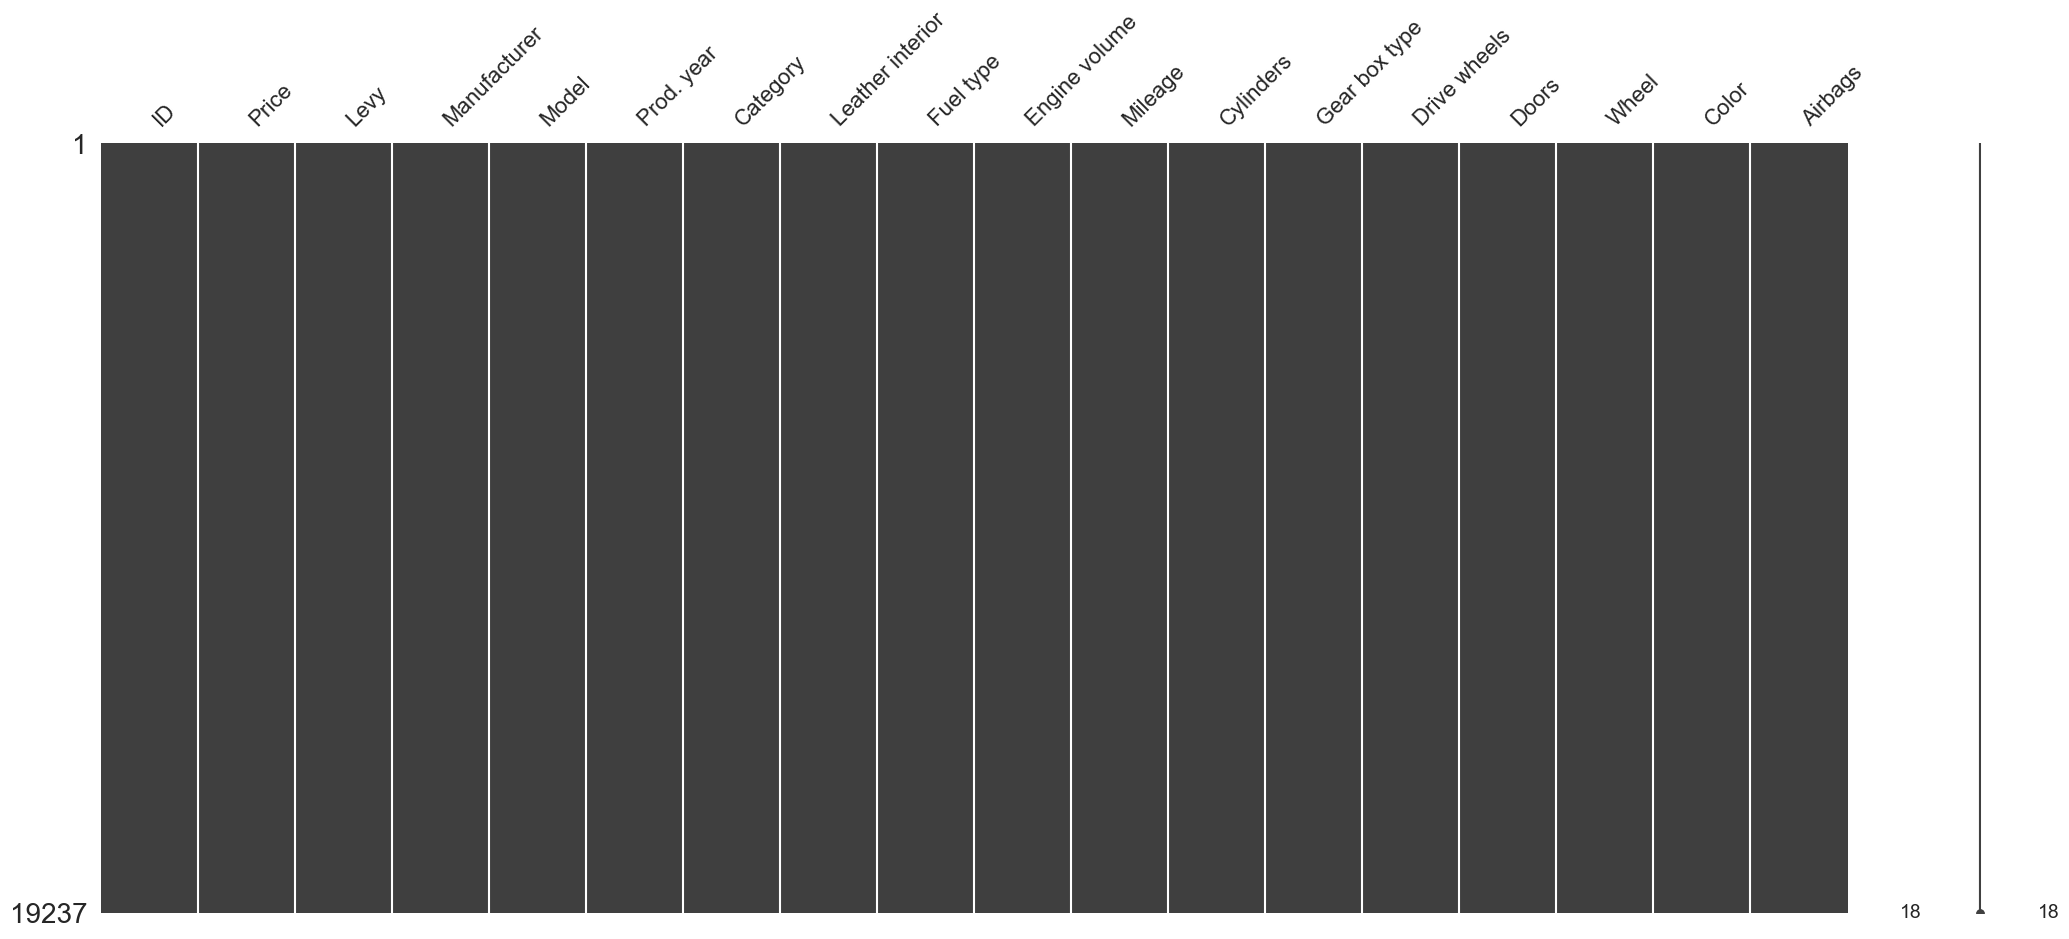

In [126]:
msn.matrix(car_price_enc)
#построил матрицу Null значений`

In [127]:
car_price_enc.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,632.528669,2010.912824,2.307990,1.532236e+06,4.582991,6.582627
std,9.365914e+05,1.905813e+05,567.721688,5.668673,0.877805,4.840387e+07,1.199933,4.320168
min,2.074688e+07,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,0.000000,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,642.000000,2012.000000,2.000000,1.260000e+05,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,917.000000,2015.000000,2.500000,1.888880e+05,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,16.000000


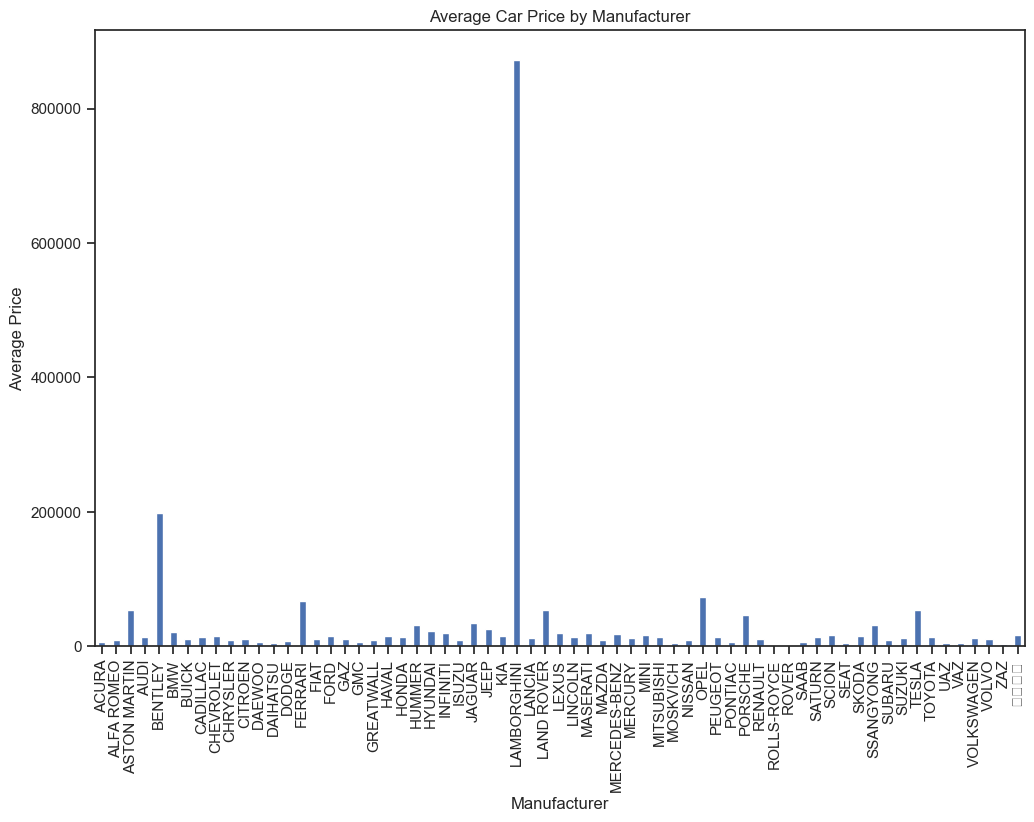

In [ ]:
plt.figure(figsize=(12, 8))
car_price_enc.groupby('Manufacturer')['Price'].mean().plot(kind='bar')
plt.title('Средняя цена автомобиля в зависиости от производителю')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.show()
# реализация графика Распределение цен по производителям

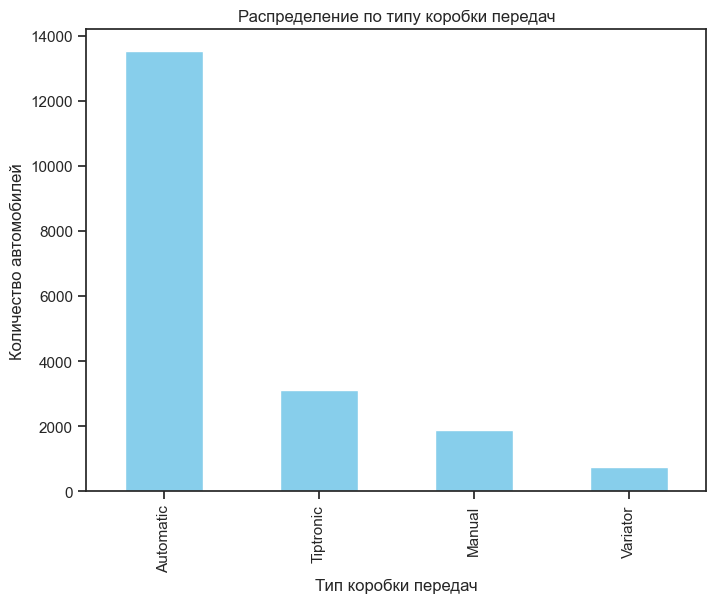

In [129]:
gearbox_distribution = car_price_enc['Gear box type'].value_counts()
plt.figure(figsize=(8, 6))
gearbox_distribution.plot(kind='bar', color='skyblue')
plt.title('Распределение по типу коробки передач')
plt.xlabel('Тип коробки передач')
plt.ylabel('Количество автомобилей')
plt.show()

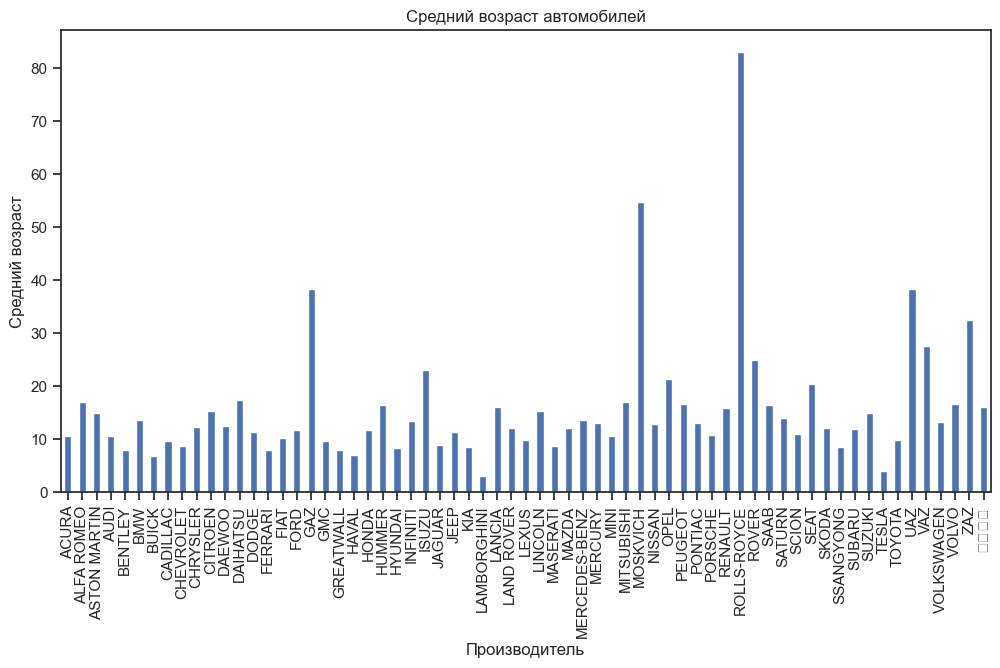

In [130]:
car_price_enc['Age'] = 2022 - car_price_enc['Prod. year']
plt.figure(figsize=(12, 6))
# График среднего возраста автомобилей
average_age = car_price_enc.groupby('Manufacturer')['Age'].mean()
average_age.plot(kind='bar', title='Средний возраст автомобилей')
plt.xlabel('Производитель')
plt.ylabel('Средний возраст')
plt.show()



In [131]:
# Подсчет количества автомобилей с кожаным салоном
print('Подсчет количества автомобилей с кожаным салоном')
leather_interior_count = car_price_enc['Leather interior'].value_counts()
print(leather_interior_count)

Подсчет количества автомобилей с кожаным салоном
Leather interior
Yes    13954
No      5283
Name: count, dtype: int64


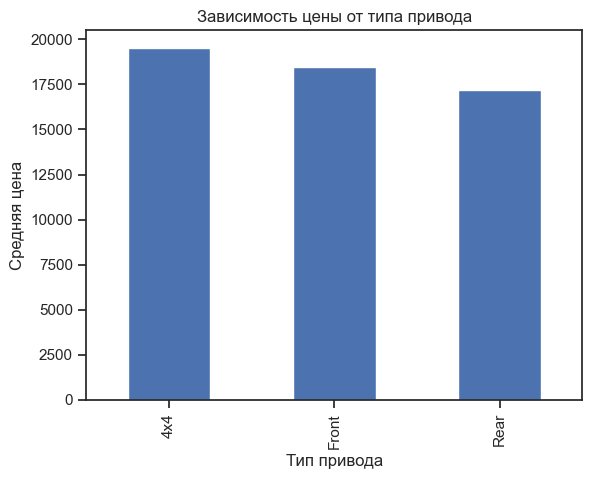

In [132]:
drive_wheels_prices = car_price_enc.groupby('Drive wheels')['Price'].mean()

# Построение графика
drive_wheels_prices.plot(kind='bar')
plt.title('Зависимость цены от типа привода')
plt.xlabel('Тип привода')
plt.ylabel('Средняя цена')
plt.show()

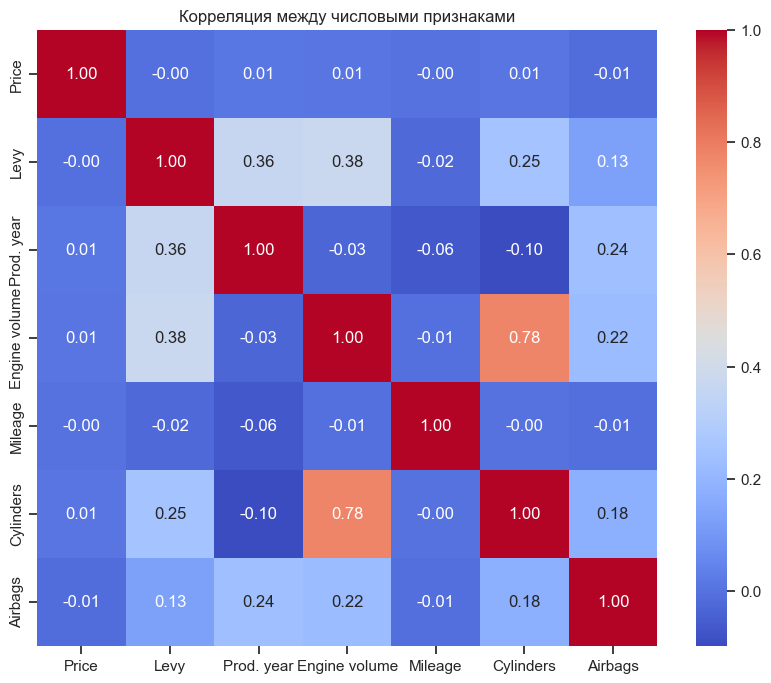

In [133]:
numeric_features = ['Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']

# Создание корреляционной матрицы
corr_matrix = car_price_enc[numeric_features].corr()

# Построение тепловой карты корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляция между числовыми признаками')
plt.show()

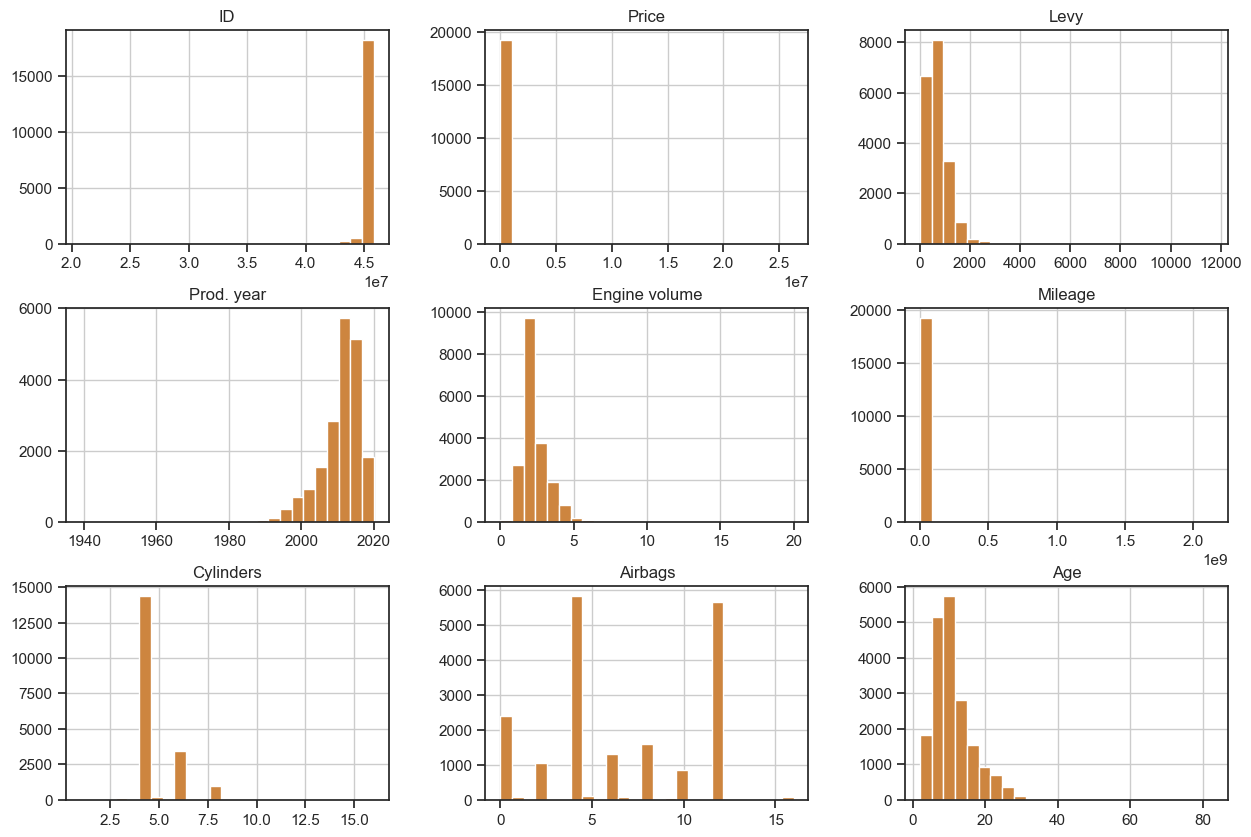

In [134]:
car_price_enc.hist(bins=25,figsize=(15,10),color='peru')
plt.show()

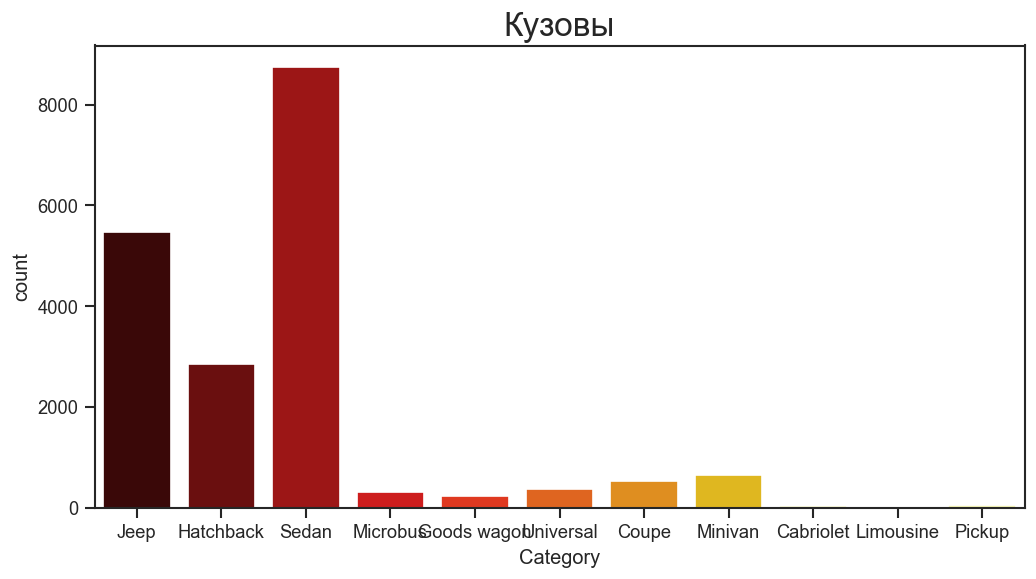

In [135]:
plt.subplots(figsize=(10,5), dpi=120)
sns.countplot(data= car_price_enc, x='Category',palette='hot')
plt.title("Кузовы",fontsize=20)
plt.show()

In [136]:
# 1. Average car price
average_price = car_price_enc['Price'].mean()

# 2. Median car price
median_price = car_price_enc['Price'].median()

# 3. Maximum car price
max_price = car_price_enc['Price'].max()

# 4. Minimum car price
min_price = car_price_enc['Price'].min()

# 5. Average car mileage
average_mileage = car_price_enc['Mileage'].mean()

# 6. Average engine volume
average_engine_volume = car_price_enc['Engine volume'].mean()

print("Average car price:", average_price)
print("Median car price:", median_price)
print("Maximum car price:", max_price)
print("Minimum car price:", min_price)
print("Average car mileage:", average_mileage)
print("Average engine volume:", average_engine_volume)

Average car price: 18555.92722357956
Median car price: 13172.0
Maximum car price: 26307500
Minimum car price: 1
Average car mileage: 1532235.68768519
Average engine volume: 2.307989811301139


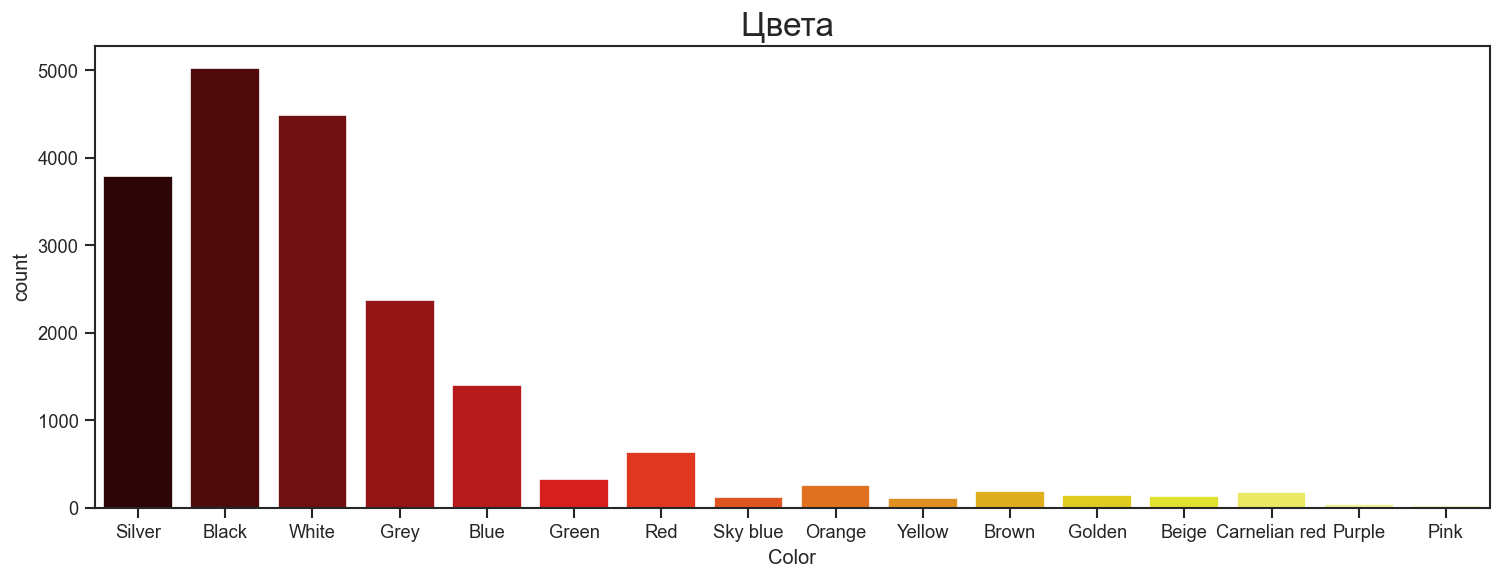

In [137]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= car_price_enc, x='Color',palette='hot')
plt.title("Цвета ",fontsize=20)
plt.show()

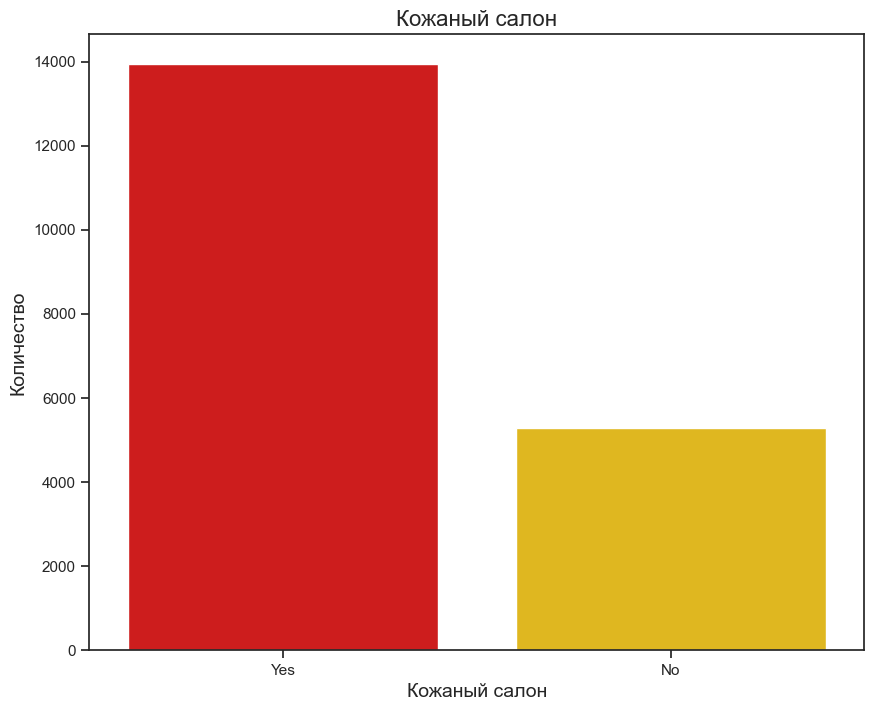

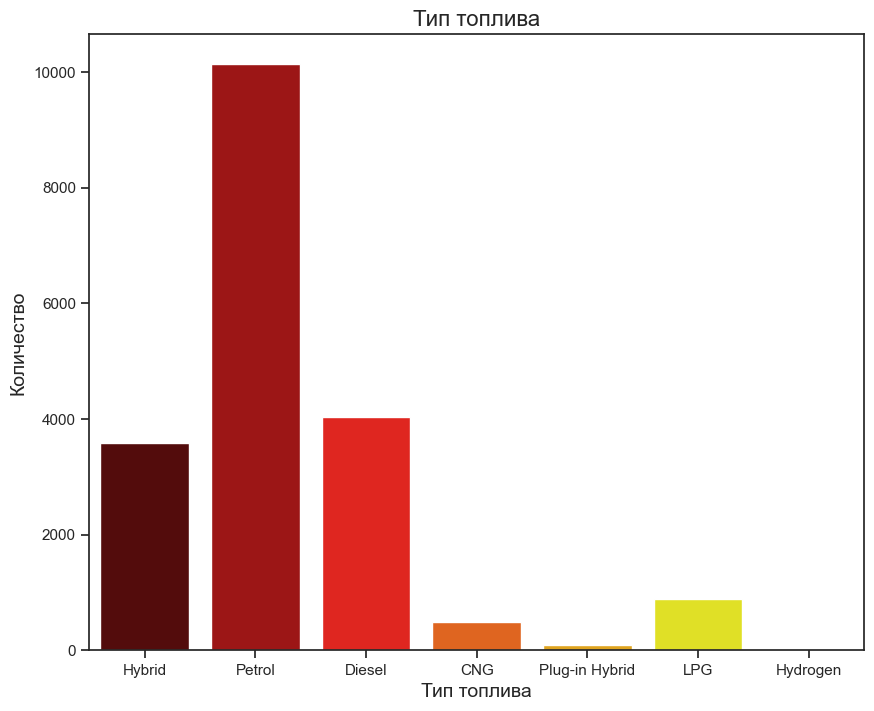

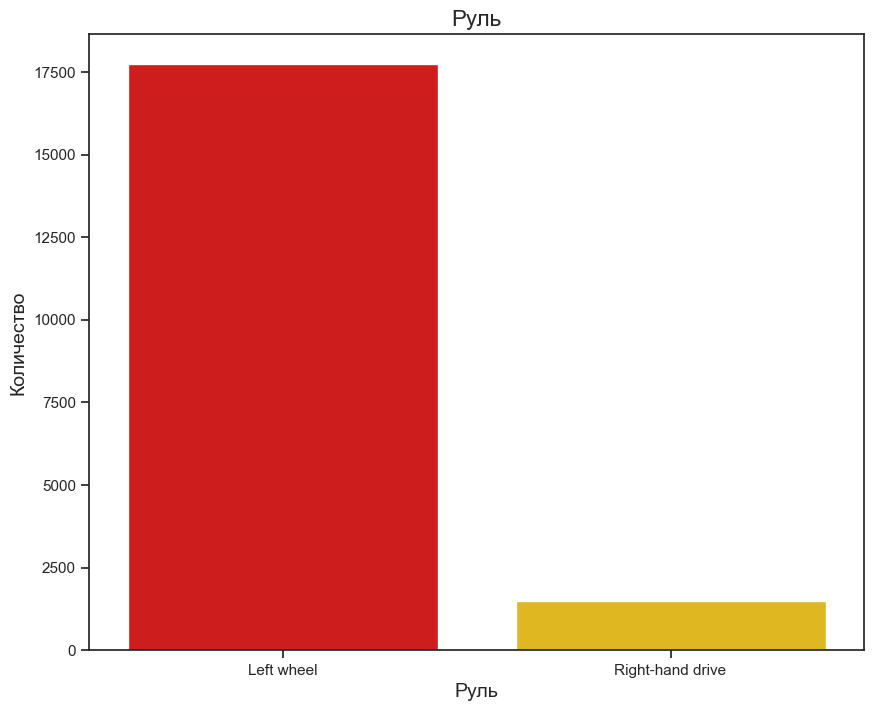

In [138]:
columns = ['Leather interior', 'Fuel type', 'Wheel']

translations = {'Leather interior': 'Кожаный салон', 'Fuel type': 'Тип топлива', 'Wheel': 'Руль'}

for col in columns:
    plt.figure(figsize=(10, 8))
  
    sns.countplot(data=car_price_enc, x=col, palette='hot')
    plt.title(translations[col], fontsize=16)
    plt.xlabel(translations[col], fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    plt.show()


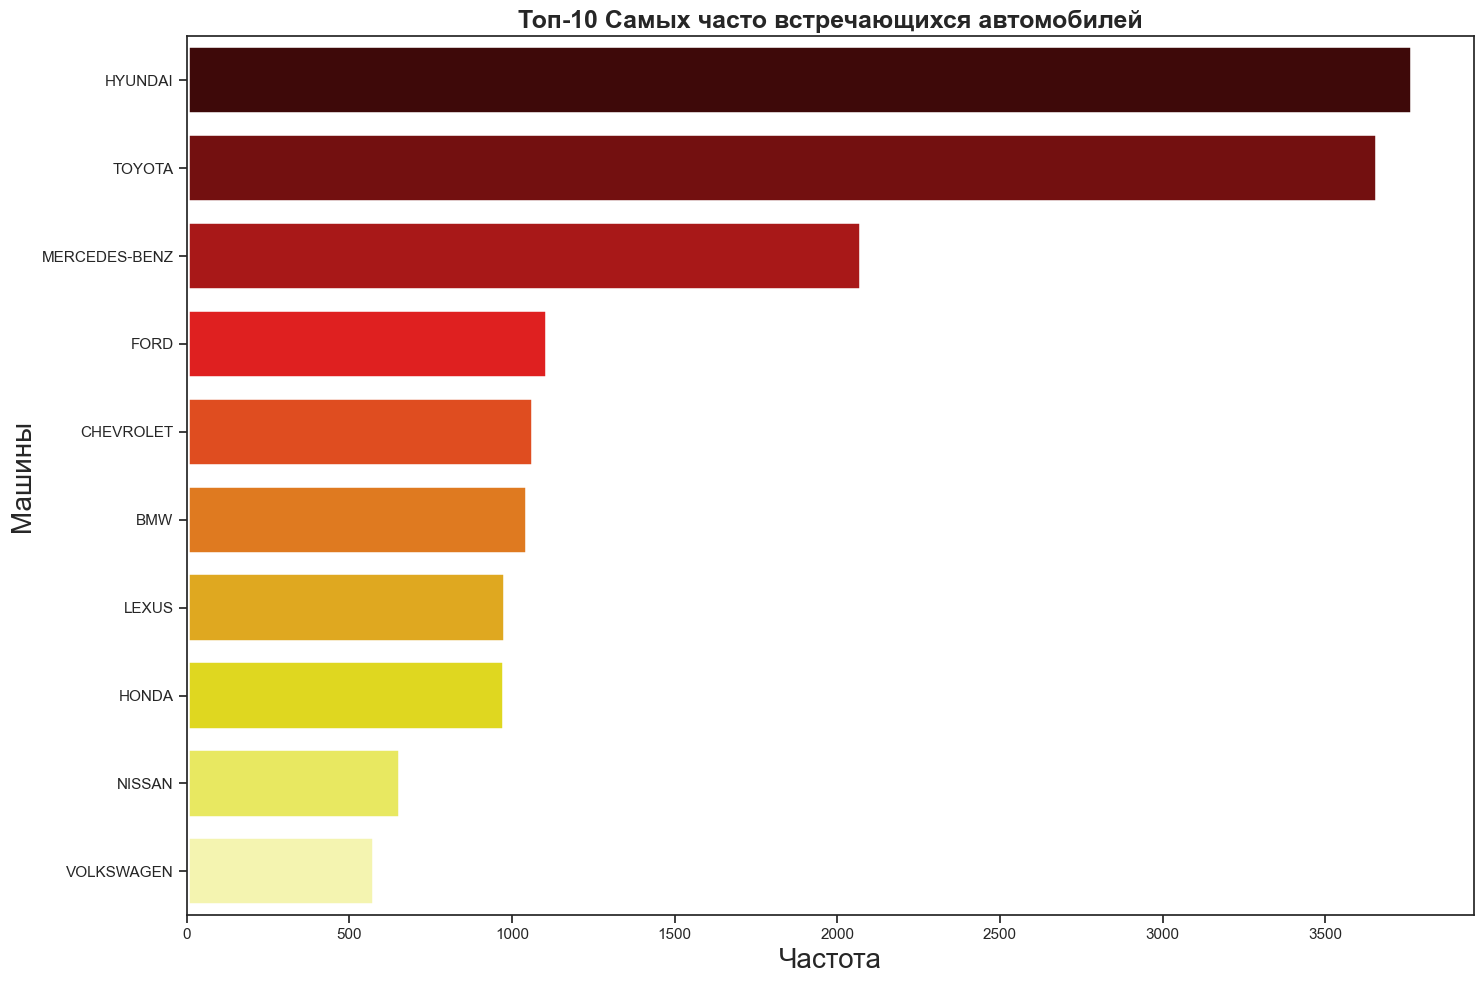

In [139]:
top_10_cars = car_price_enc.Manufacturer.value_counts().sort_values(ascending=False)[:10]

plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Топ-10 Самых часто встречающихся автомобилей',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Частота',fontsize=20)
plt.ylabel('Машины',fontsize=20)
plt.tight_layout()
plt.show()

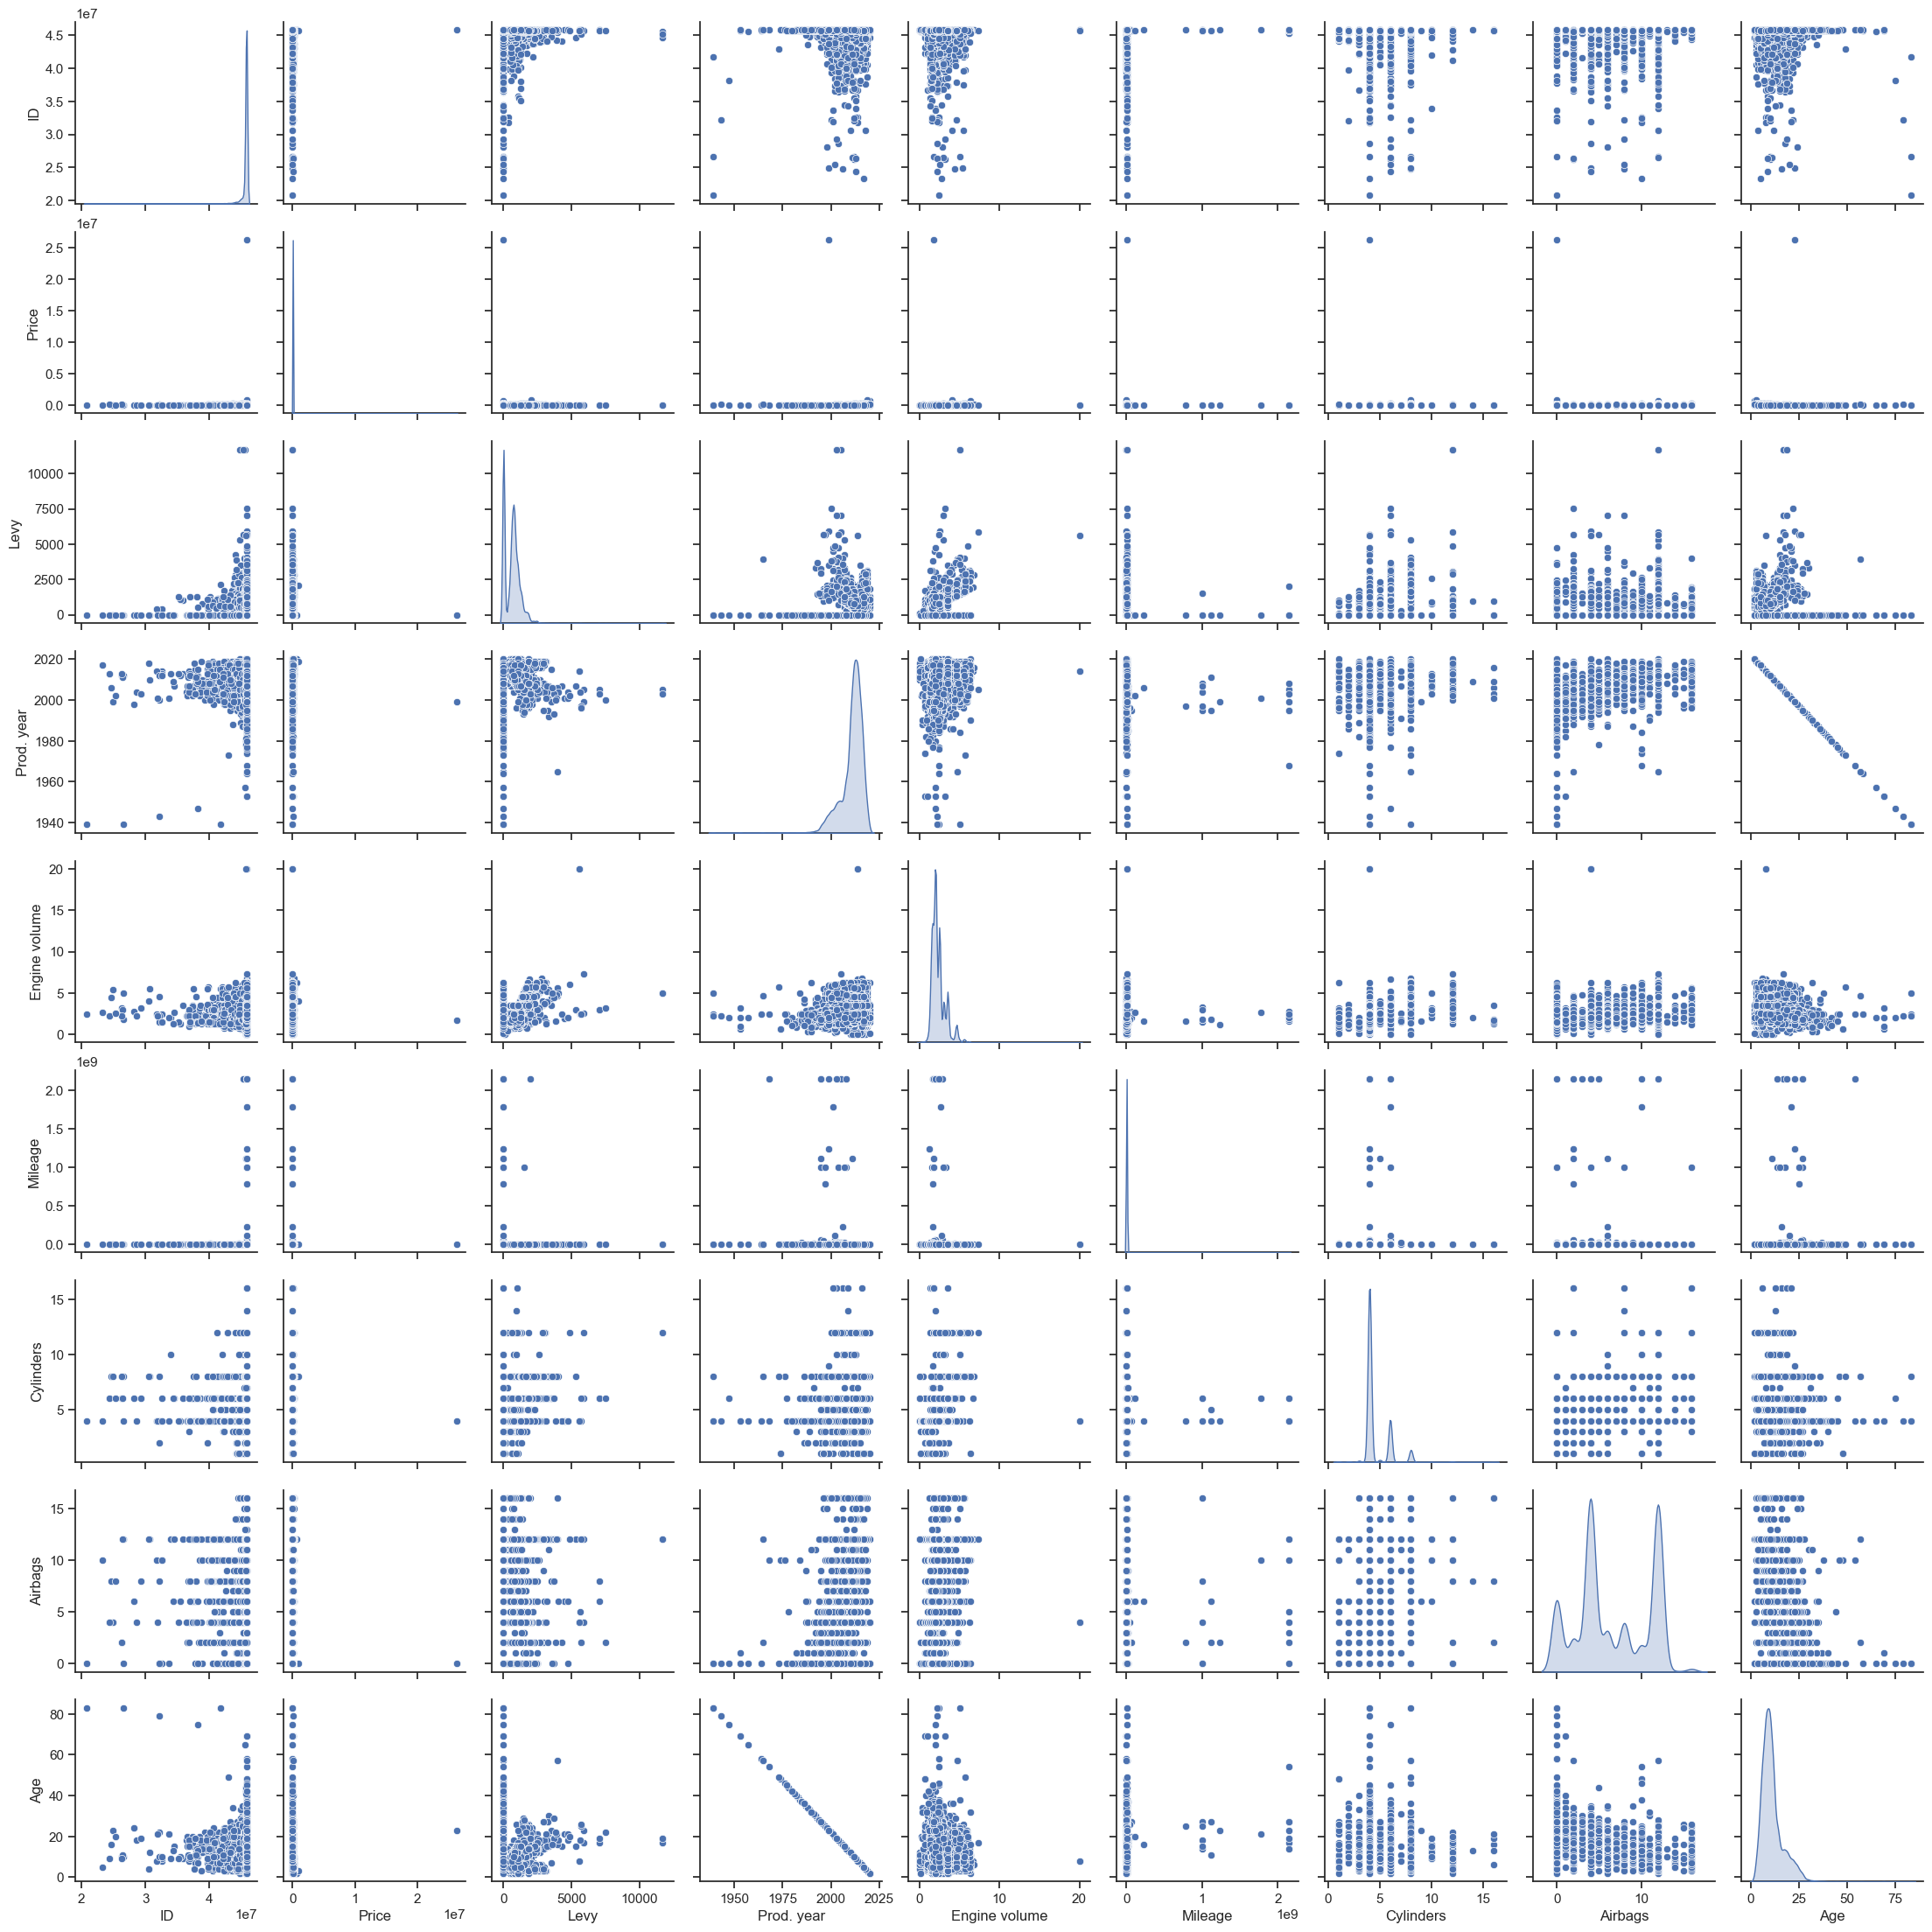

In [140]:
sns.set(style="ticks")
sns.pairplot(car_price_enc, diag_kind='kde')
plt.show()

In [141]:
car_price_enc.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,11
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2,16
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0,11
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4,8


In [142]:
categorical_columns = ['Manufacturer', 'Prod. year','Category','Fuel type','Gear box type','Wheel','Leather interior','Drive wheels','Doors']

car_price_enc = pd.get_dummies(car_price_enc, columns=categorical_columns)

In [143]:
label_endcoder = LabelEncoder()


for i in car_price_enc.columns:
    
    if type(car_price_enc[i][0]) == str:
        car_price_enc[i] = label_endcoder.fit_transform(car_price_enc[i])
car_price_enc

,ID,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,45654403,13328,1399,1242,3.5,186005.0,6.0,12,12,12,...,True,False,False,True,True,False,False,False,True,False
1,44731507,16621,1018,658,3.0,192000.0,6.0,1,8,11,...,True,False,True,False,True,False,False,False,True,False
2,45774419,8467,0,684,1.3,200000.0,4.0,1,2,16,...,False,True,True,False,False,True,False,False,True,False
3,45769185,3607,862,661,2.5,168966.0,4.0,14,0,11,...,True,False,False,True,True,False,False,False,True,False
4,45809263,11726,446,684,1.3,91901.0,4.0,12,4,8,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,385,2.0,300000.0,4.0,12,5,23,...,True,False,False,True,False,False,True,True,False,False
19233,45778856,15681,831,1334,2.4,161600.0,4.0,11,8,11,...,True,False,False,True,False,True,False,False,True,False
19234,45804997,26108,836,1442,2.0,116365.0,4.0,7,4,12,...,True,False,False,True,False,True,False,False,True,False
19235,45793526,5331,1288,456,2.0,51258.0,4.0,1,4,15,...,True,False,False,True,False,True,False,False,True,False


In [144]:

car_price_enc = car_price_enc.drop(['ID'],axis = 1)
car_price_enc

,Price,Levy,Model,Engine volume,Mileage,Cylinders,Color,Airbags,Age,Manufacturer_ACURA,...,Wheel_Left wheel,Wheel_Right-hand drive,Leather interior_No,Leather interior_Yes,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Doors_02-Mar,Doors_04-May,Doors_>5
0,13328,1399,1242,3.5,186005.0,6.0,12,12,12,False,...,True,False,False,True,True,False,False,False,True,False
1,16621,1018,658,3.0,192000.0,6.0,1,8,11,False,...,True,False,True,False,True,False,False,False,True,False
2,8467,0,684,1.3,200000.0,4.0,1,2,16,False,...,False,True,True,False,False,True,False,False,True,False
3,3607,862,661,2.5,168966.0,4.0,14,0,11,False,...,True,False,False,True,True,False,False,False,True,False
4,11726,446,684,1.3,91901.0,4.0,12,4,8,False,...,True,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,385,2.0,300000.0,4.0,12,5,23,False,...,True,False,False,True,False,False,True,True,False,False
19233,15681,831,1334,2.4,161600.0,4.0,11,8,11,False,...,True,False,False,True,False,True,False,False,True,False
19234,26108,836,1442,2.0,116365.0,4.0,7,4,12,False,...,True,False,False,True,False,True,False,False,True,False
19235,5331,1288,456,2.0,51258.0,4.0,1,4,15,False,...,True,False,False,True,False,True,False,False,True,False


In [ ]:
car_price_enc['Price'] = car_price_enc['Price'].apply(int)
car_price_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Columns: 160 entries, Price to Doors_>5
dtypes: bool(151), float64(3), int64(6)
memory usage: 4.1 MB


In [147]:

# обучение модели на
X = car_price_enc.drop('Price', axis = 1)
y = car_price_enc['Price']


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score



# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создайте модель градиентного бустинга
my_model = GradientBoostingRegressor(n_estimators=50, random_state=42)  # Можете настраивать количество деревьев и другие параметры

# Обучите модель на тренировочных данных
my_model.fit(X_train, y_train)

# Сделайте прогноз на тестовых данных
y_pred = my_model.predict(X_test)

# Оцените производительность модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 8463.251886605452


In [157]:
tpot = TPOTRegressor(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)

#Оценка модели
print(tpot.score(X_test, y_test))

#Экспорт обученной модели
tpot.export('tpot_regressor_pipeline.py')

                                                                               
Generation 1 - Current best internal CV score: -48288324498.08476
                                                                             
Generation 2 - Current best internal CV score: -48185488701.48781
                                                                             
Generation 3 - Current best internal CV score: -48147369026.22539
                                                                              
Generation 4 - Current best internal CV score: -48147369026.22539
                                                                               
Generation 5 - Current best internal CV score: -48141387467.105934
                                                           
Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.95, learning_rate=0.1, loss=huber, max_depth=8, max_features=0.9500000000000001, min_samples_leaf=19, min_samples_split=5, n_estimators=100, subsample=

In [158]:
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, r2_score



# Разделите данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создайте модель градиентного бустинга
best_model = GradientBoostingRegressor( alpha=0.99, learning_rate=0.5,  max_depth=4, random_state=42, max_features=0.8500000000000001, min_samples_leaf=12, min_samples_split=10, n_estimators=50, subsample=0.9000000000000001)  # Можете настраивать количество деревьев и другие параметры

# Обучите модель на тренировочных данных
best_model.fit(X_train, y_train)

# Сделайте прогноз на тестовых данных
y_pred = best_model.predict(X_test)

# Оцените производительность модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 17843.84058600473


In [159]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(loss_function='RMSE')

model.fit(X_train, y_train, verbose=100)

Learning rate set to 0.062421
0:	learn: 216424.4501996	total: 4.09ms	remaining: 4.08s
100:	learn: 52226.0242243	total: 193ms	remaining: 1.72s
200:	learn: 21041.8713381	total: 383ms	remaining: 1.52s
300:	learn: 13676.1239603	total: 555ms	remaining: 1.29s
400:	learn: 11253.3496069	total: 739ms	remaining: 1.1s
500:	learn: 10064.0595713	total: 924ms	remaining: 920ms
600:	learn: 9345.9485142	total: 1.1s	remaining: 734ms
700:	learn: 8758.4500650	total: 1.29s	remaining: 552ms
800:	learn: 8318.5808773	total: 1.52s	remaining: 377ms
900:	learn: 7984.5938209	total: 1.7s	remaining: 187ms
999:	learn: 7694.3859451	total: 1.89s	remaining: 0us


In [160]:
y_pred = model.predict(X_test)


# calculate mean squared error on val sub-set preds
np.sqrt(mean_squared_error(y_pred, y_test))

146175.25554367225

In [151]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_


param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]
}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train, y_train)
best_ridge = grid_ridge.best_estimator_


param_grid_lasso = {
    'alpha': [0.1, 1, 10, 100, 1000]
}
grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)
best_lasso = grid_lasso.best_estimator_


param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train, y_train)
best_gb = grid_gb.best_estimator_


models = [
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=50, random_state=42)),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor())
]

models = [
    ('Random Forest', best_rf),
    ('Ridge Regression', best_ridge),
    ('Lasso Regression', best_lasso),
    ('Gradient Boosting', best_gb)
]

for model_name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print('--------------------------')
# На основании представленных данных, модель Gradient Boosting обладает наилучшей производительностью,
#так как имеет наименьшее значение среднеквадратической ошибки (Mean Squared Error) и наименьшее значение среднеквадратического отклонения (rmse),
#что указывает на более точные прогнозы.

Model: Random Forest
Mean Squared Error: 378880813.65
Mean Absolute Error: 12268.58
RMSE: 19464.86
--------------------------
Model: Ridge Regression
Mean Squared Error: 308340888.57
Mean Absolute Error: 11645.84
RMSE: 17559.64
--------------------------
Model: Lasso Regression
Mean Squared Error: 399434263.97
Mean Absolute Error: 12304.12
RMSE: 19985.85
--------------------------
Model: Gradient Boosting
Mean Squared Error: 222178426.98
Mean Absolute Error: 5720.36
RMSE: 14905.65
--------------------------


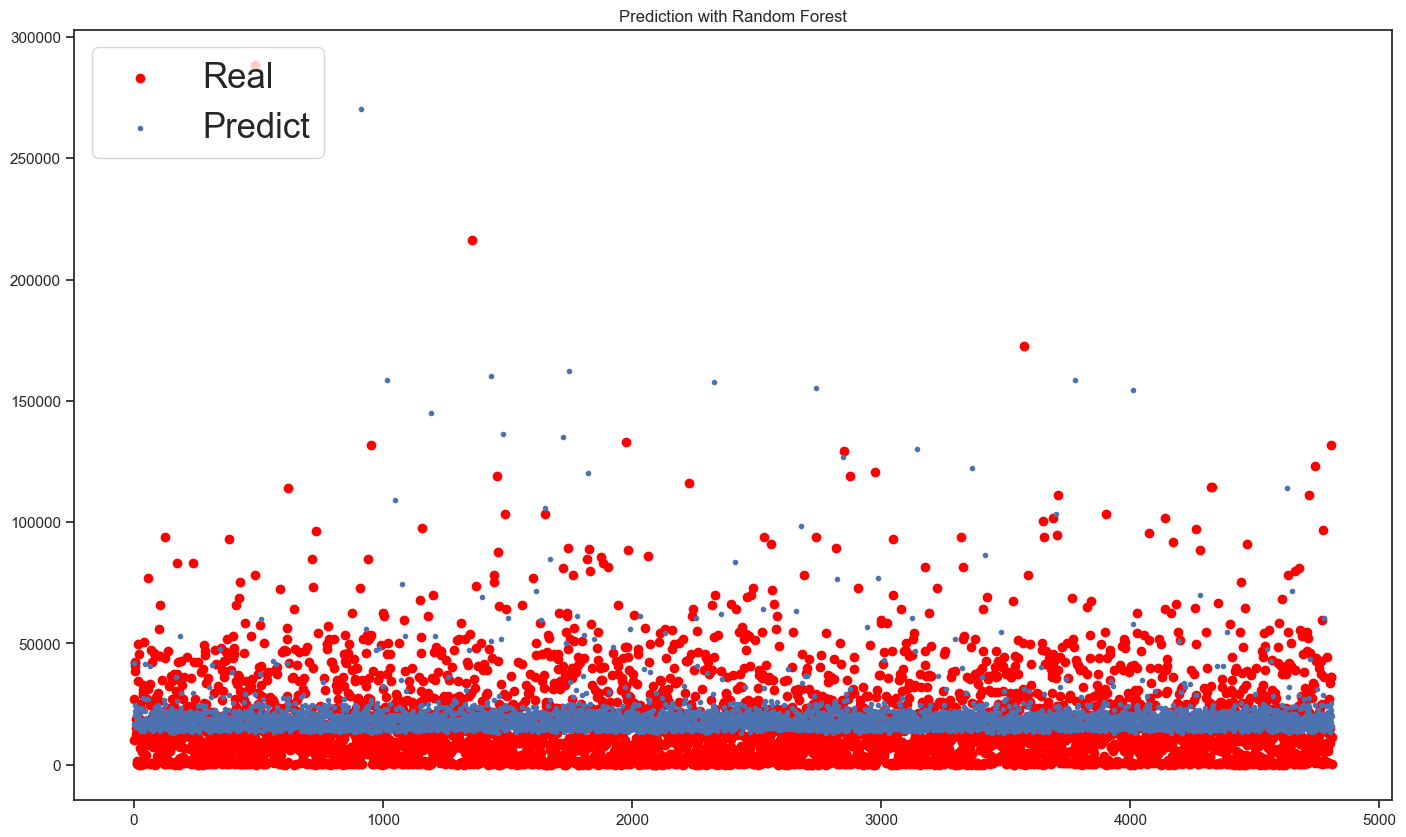

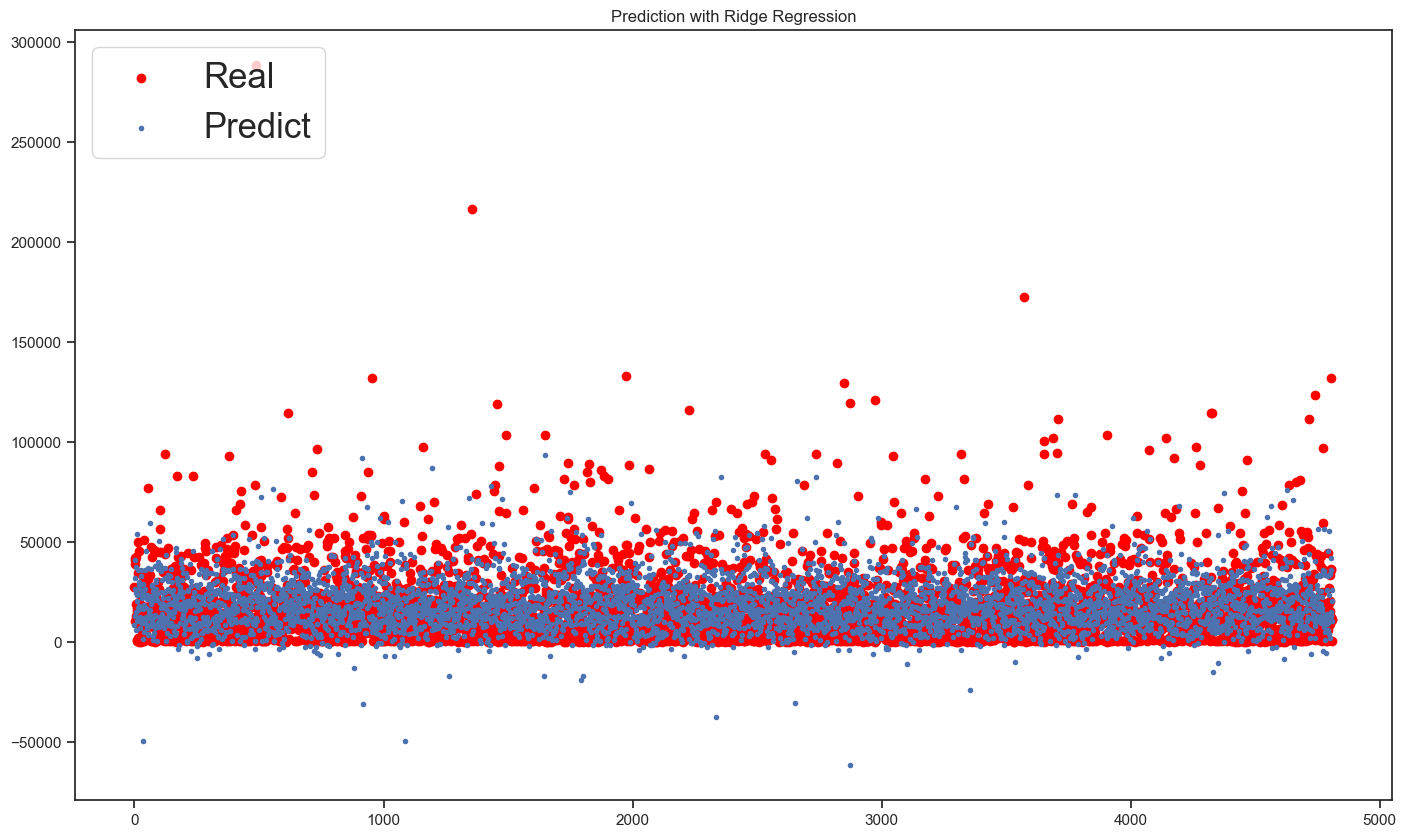

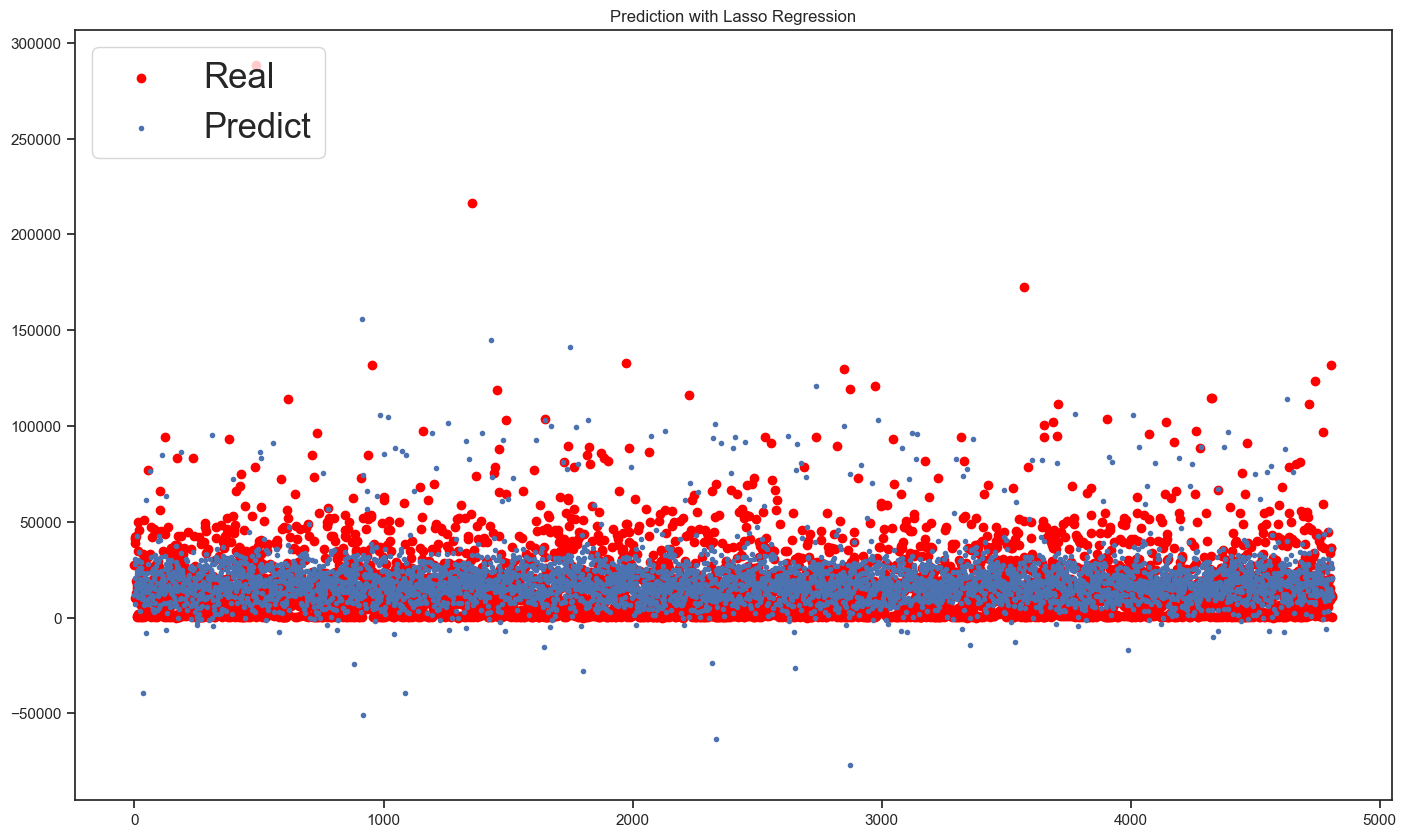

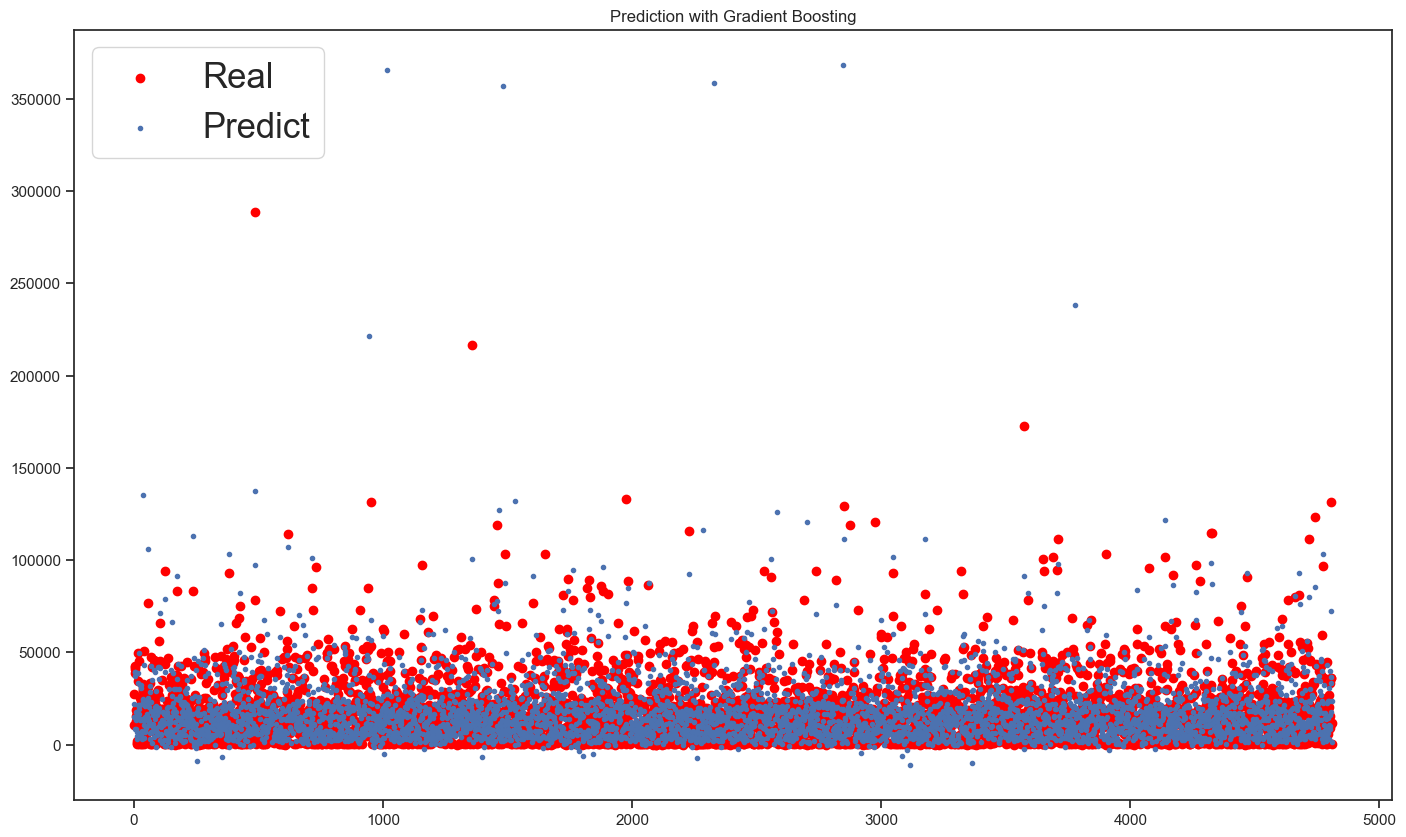

In [162]:
predictions = []

for model_name, model in models:
    y_pred = model.predict(X_test)
    predictions.append((model_name, y_pred))


for model_name, y_pred in predictions:
    fig = plt.figure(figsize=(17, 10))
    plt.title(f"Prediction with {model_name}")
    plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Real')
    plt.scatter(range(X_test.shape[0]), y_pred, marker='.', label='Predict')
    plt.legend(loc=2, prop={'size': 25})
    plt.show()

In [154]:
models

[('Random Forest',
  RandomForestRegressor(max_depth=4, max_features='log2', min_samples_split=5,
                        n_estimators=300)),
 ('Ridge Regression', Ridge(alpha=1000)),
 ('Lasso Regression', Lasso(alpha=1000)),
 ('Gradient Boosting',
  GradientBoostingRegressor(learning_rate=0.2, max_depth=4, n_estimators=300,
                            random_state=42))]

In [155]:
import shap
explainer_your_model = shap.Explainer(my_model)
shap_values_your_model = explainer_your_model.shap_values(X_test)

# SHAP для TPOT модели
explainer_tpot = shap.Explainer(best_model)
shap_values_tpot = explainer_tpot.shap_values(X_test)

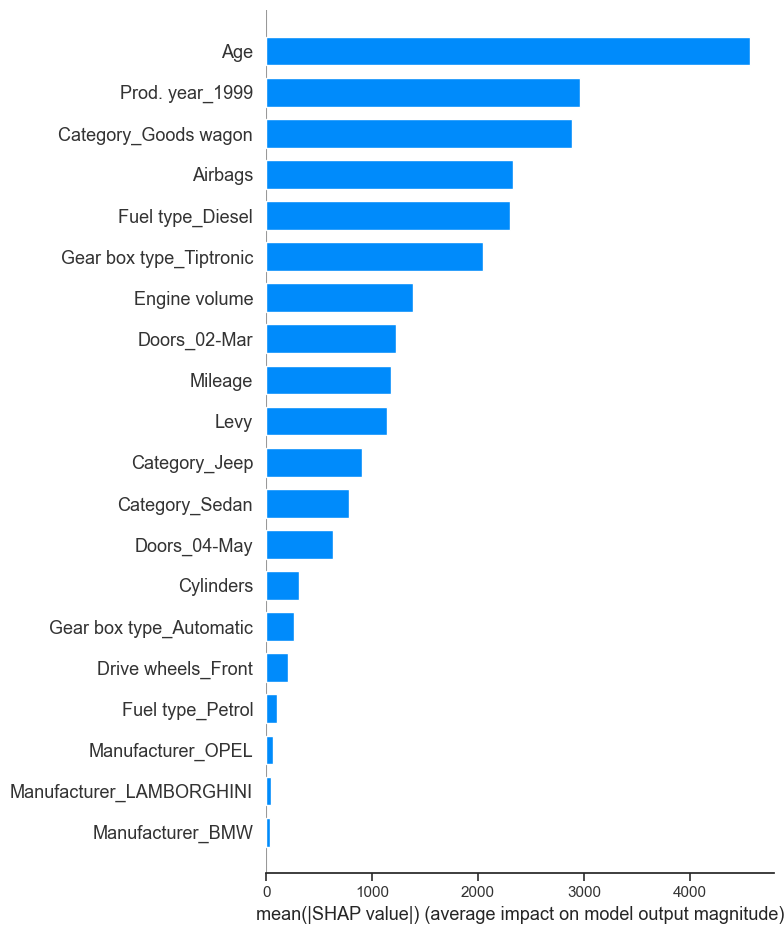

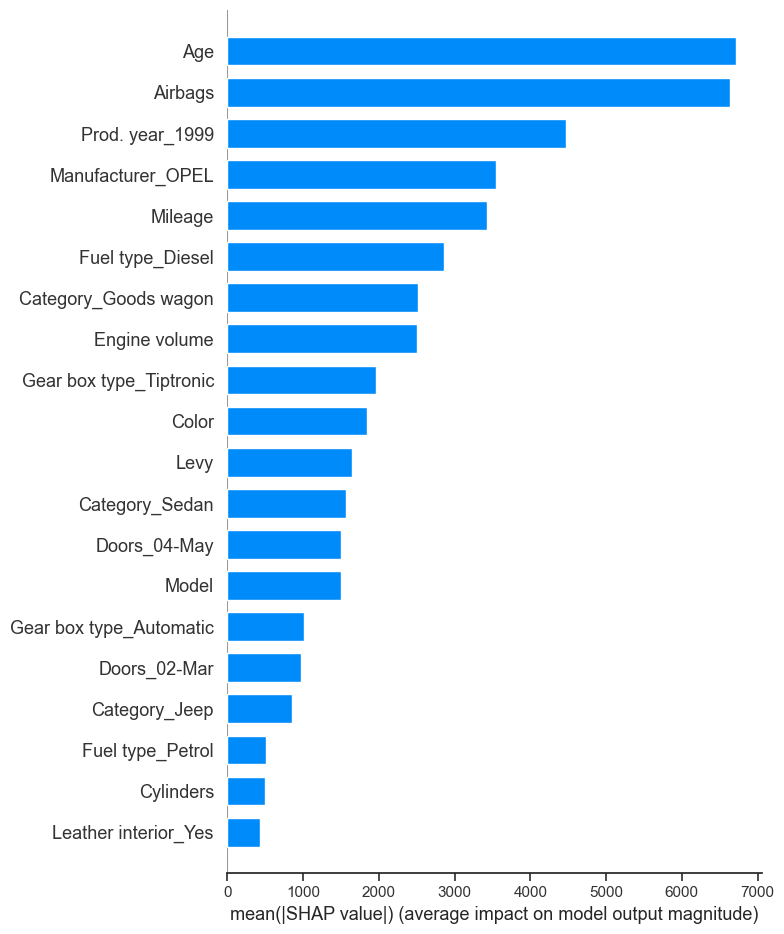

In [156]:
# График для нашей модели
shap.summary_plot(shap_values_your_model, X_test, plot_type="bar")

# График для TPOT модели
shap.summary_plot(shap_values_tpot, X_test, plot_type="bar")

In [167]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from kerastuner.tuners import RandomSearch

# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Функция для построения улучшенной модели
def build_improved_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=64, max_value=512, step=64),
                    input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(BatchNormalization())  

    # Добавление скрытых слоев с регуляризацией Dropout
    for i in range(hp.Int('num_layers', min_value=2, max_value=6)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=64, max_value=512, step=64), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))
        model.add(BatchNormalization()) 

    model.add(Dense(1, activation='linear'))

    # Планирование скорости обучения
    initial_learning_rate = hp.Choice('initial_learning_rate', values=[1e-3, 5e-4, 1e-4])
    lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=10000, decay_rate=0.9)
    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

# Увеличиваем количество попыток и эпох для поиска параметров
tuner = RandomSearch(
    build_improved_model,
    objective='val_loss',
    max_trials=75, 
    directory='my_dir',
    project_name='my_project'
)

# Поиск оптимальных параметров
tuner.search(X_train_scaled, y_train, epochs=200, validation_data=(X_test_scaled, y_test))  

# Получение лучших гиперпараметров
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

# Создание и обучение окончательной модели с лучшими гиперпараметрами
final_model = tuner.hypermodel.build(best_hp)
final_model.fit(X_train_scaled, y_train, epochs=450, batch_size=64, validation_data=(X_test_scaled, y_test))

# Оценка производительности окончательной модели
y_pred = final_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Среднеквадратичная ошибка: {mse:.2f}')
print(f'Средняя абсолютная ошибка: {mae:.2f}')
print(f'Корень из среднеквадратичной ошибки: {rmse:.2f}')


Trial 75 Complete [00h 01m 48s]
val_loss: 158458096.0

Best val_loss So Far: 112329968.0
Total elapsed time: 5d 22h 48m 01s


Epoch 1/450
226/226 [==============================] - 1s 2ms/step - loss: 48686739456.0000 - mae: 19055.3867 - val_loss: 599486528.0000 - val_mae: 17052.7031
Epoch 2/450
226/226 [==============================] - 0s 2ms/step - loss: 48685477888.0000 - mae: 19042.7520 - val_loss: 598499200.0000 - val_mae: 17038.5977
Epoch 3/450
226/226 [==============================] - 0s 2ms/step - loss: 48683622400.0000 - mae: 19025.0879 - val_loss: 598161664.0000 - val_mae: 17028.3359
Epoch 4/450
226/226 [==============================] - 0s 2ms/step - loss: 48681291776.0000 - mae: 19001.3574 - val_loss: 595586560.0000 - val_mae: 16994.3438
Epoch 5/450
226/226 [==============================] - 0s 2ms/step - loss: 48680124416.0000 - mae: 18979.3730 - val_loss: 594216896.0000 - val_mae: 16969.7246
Epoch 6/450
226/226 [==============================] - 0s 2ms/step - loss: 48678100992.0000 - mae: 18953.1641 - val_loss: 593217536.0000 - val_mae: 16946.9609
Epoch 7/450
226/226 [=========================

151/151 [==============================] - 0s 482us/step


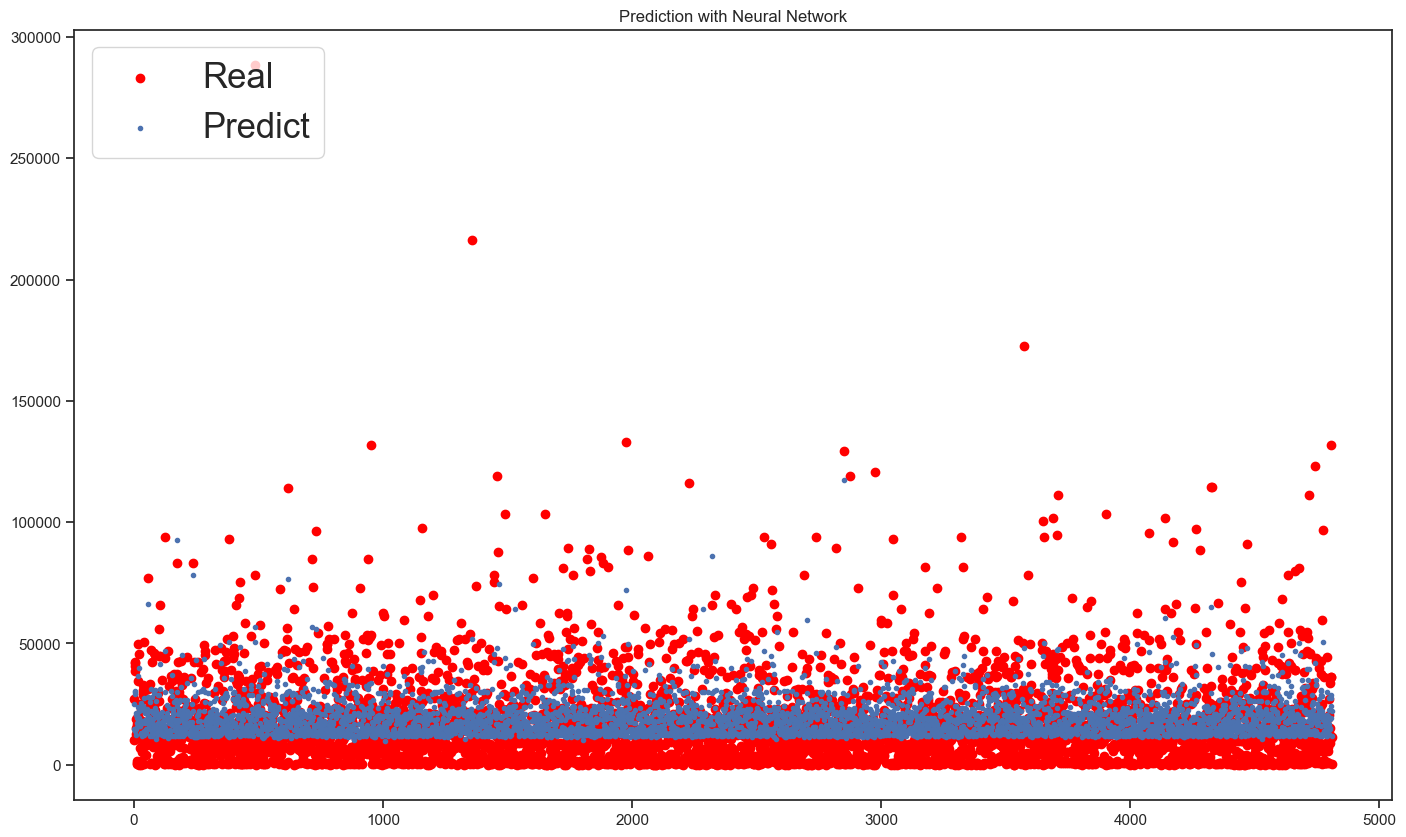

In [168]:
# Выполнение предсказаний с помощью окончательной модели нейронной сети
y_pred_nn = final_model.predict(X_test_scaled)

# Визуализация результатов
plt.figure(figsize=(17, 10))
plt.title("Prediction with Neural Network")
plt.scatter(range(X_test.shape[0]), y_test, color='red', label='Real')
plt.scatter(range(X_test.shape[0]), y_pred_nn, marker='.', label='Predict')
plt.legend(loc=2, prop={'size': 25})
plt.show()
